## Importing primary libraries

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Making our Dataset

In [225]:
df = pd.read_csv('houseprice.csv')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


## Changing Boolean datas to 0 and 1 to be usable

In [226]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


## Let's get more information about our datasets

In [227]:
df.describe()

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


## from .describe() I found out that the 'Area' column cannot be displayed
## so Let's check the type of these values

In [228]:
df['Area'].dtype

dtype('O')

## We should change this column type to numerical values

In [229]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3473.000000,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,106.774547,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,69.365567,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


## Removing houses without addresses

In [230]:
df = df.dropna(subset=['Address'])
df.info

<bound method DataFrame.info of        Area  Room  Parking  Warehouse  Elevator             Address  \
0      63.0     1        1          1         1             Shahran   
1      60.0     1        1          1         1             Shahran   
2      79.0     2        1          1         1              Pardis   
3      95.0     2        1          1         1       Shahrake Qods   
4     123.0     2        1          1         1      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3474   86.0     2        1          1         1  Southern Janatabad   
3475   83.0     2        1          1         1            Niavaran   
3476   75.0     2        0          0         0              Parand   
3477  105.0     2        1          1         1              Dorous   
3478   82.0     2        0          1         1              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+

## Fixing the problem of some sizes being incorrect

In [231]:
max(df['Area'])

929.0

In [232]:
min_area = 30
max_area = 600
df = df[(df['Area'] >= min_area) & (df['Area'] <= max_area)]

In [233]:
max(df['Area'])

600.0

## Cleaning the Dataset with removing unusable columns

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Room'}>],
       [<AxesSubplot:title={'center':'Parking'}>,
        <AxesSubplot:title={'center':'Warehouse'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

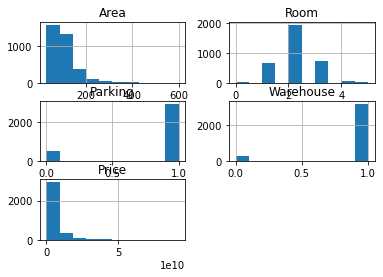

In [234]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Price']]
cdf.hist()

## I used histogram to decide which column can help me more to make a Simple Linear regression model, but to make sure we will scatter datas

## Data scattering for making a better decision in removing some values and model selection for simple linear regression

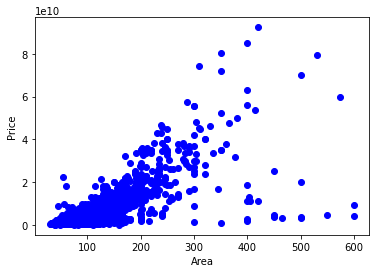

In [235]:
plt.scatter(cdf.Area, cdf.Price, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

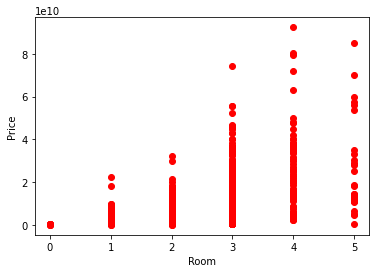

In [236]:
plt.scatter(cdf.Room, cdf.Price, color='red')
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

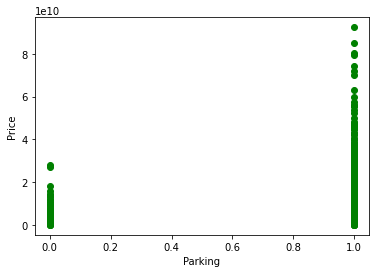

In [237]:
plt.scatter(cdf.Parking, cdf.Price, color='green')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()

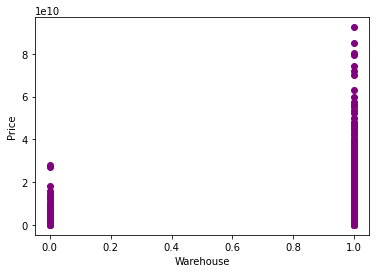

In [238]:
plt.scatter(cdf.Warehouse, cdf.Price, color='purple')
plt.xlabel('Warehouse')
plt.ylabel('Price')
plt.show()

## The 'Area' column makes more sence to be used for Simple linear regression
### so lets start making our model

## making 'train' and 'test' arrays

In [254]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [255]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train['Price'])
regr.fit(train_x, train_y)
print('Coefficient:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficient: [98179332.096724]
Intercept: -5061121812.052683


## Using 'Coefficient' and 'Intercept' to plott our predicting line

Text(0, 0.5, 'Price')

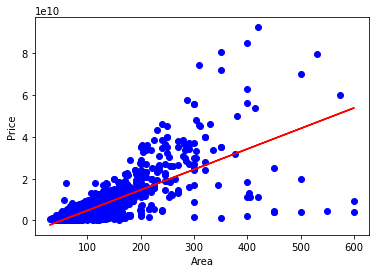

In [256]:
plt.scatter(train.Area, train.Price, color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r-')
plt.xlabel('Area')
plt.ylabel('Price')

## Model performance evaluation

In [257]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test['Price'])
test_y_ = regr.predict(test_x)
print('r2score: %.2f' % r2_score(test_y, test_y_))
print('MSE: %.2f' %mean_squared_error(test_y,test_y_))

r2score: 0.53
MSE: 21993193266321403904.00


## Lets Try Multiple Linear Regression and use all continues values

In [258]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Making the Multiple Linear Regression model

In [260]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[8.92712617e+07 5.96965898e+08 1.39133523e+08 1.44068826e+09]]
Intercept:  [-6.78105067e+09]


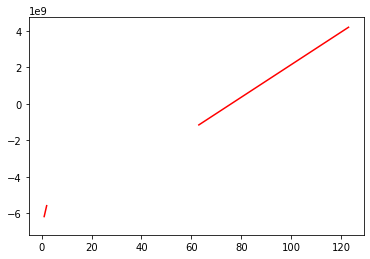

In [261]:
plt.plot(train_x[0:3],+regr.coef_[0:3]*train_x[0:3]+  regr.intercept_ , 'r-')
plt.show()

## Model performance evaluation

In [262]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)
print('R2 score: %.2f '% r2_score(test_y, test_y_))
print('MSE: %.2f' %mean_squared_error(test_y,test_y_))

R2 score: 0.63 
MSE: 16964251225784926208.00


## The accuracy shows that MUltiple Linear Regression is not suitable

# Polynomial Regression

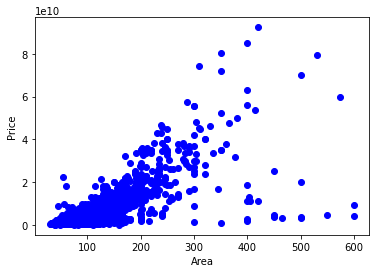

In [263]:
plt.scatter(cdf.Area, cdf.Price, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

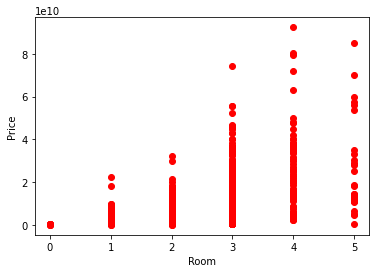

In [264]:
plt.scatter(cdf.Room, cdf.Price, color='red')
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

## Train and Test split

In [265]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test= cdf[~msk]

In [266]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 7.900e+01, 6.241e+03],
       [1.000e+00, 9.500e+01, 9.025e+03],
       ...,
       [1.000e+00, 8.300e+01, 6.889e+03],
       [1.000e+00, 7.500e+01, 5.625e+03],
       [1.000e+00, 8.200e+01, 6.724e+03]])

In [267]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, train_y)
print('Coefficients :', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients : [[ 0.00000000e+00  1.28910615e+08 -8.05003956e+04]]
Intercept:  [-7.06298342e+09]


Text(0, 0.5, 'Price')

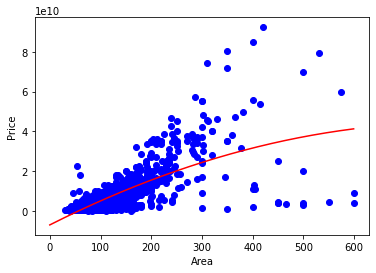

In [268]:
plt.scatter(train.Area, train.Price, color='blue')
xx = np.arange(0.0, 600, 1)
yy = regr.intercept_[0]+regr.coef_[0][1]*xx+regr.coef_[0][2]*np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Area')
plt.ylabel('Price')

In [269]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

print('R2_score: %.2f' % r2_score(test_y, test_y_))
print('MSE: %.2f' %mean_squared_error(test_y,test_y_))

R2_score: 0.60
MSE: 17023789157228566528.00
